# Kalp Hastalığı Tahmin Projesi - Makine Öğrenmesi Modelleri Karşılaştırması

## Proje Amacı
Bu projede, Kaggle üzerinden erişilebilen Heart Failure Prediction Dataset kullanılarak kalp hastalığı riskini tahmin eden makine öğrenmesi modelleri geliştirilmektedir. Çeşitli algoritmaların (Random Forest, Decision Tree, k-Nearest Neighbor, Gaussian Naive Bayes) performansları karşılaştırılarak en iyi tahmin modeli belirlenecektir.

## Veri Seti
Veri seti aşağıdaki klinik özellikleri içermektedir:
- Yaş, cinsiyet, göğüs ağrısı tipi
- Dinlenme kan basıncı, kolesterol seviyesi
- Açlık kan şekeri, EKG sonuçları
- Maksimum kalp atış hızı
- Egzersiz sırasında anjina
- ST depresyonu ve ST segment eğimi

## Araştırma Soruları
1. Makine öğrenmesi algoritmaları ile kalp yetmezliği riski doğru tahmin edilebilir mi?
2. Hangi model en yüksek performansı gösterir?
3. Random Forest tabanlı modeller diğer modellere göre daha iyi performans gösterir mi?

## 1. Gerekli Kütüphanelerin Yüklenmesi ve İçe Aktarılması

Bu bölümde projede kullanılacak tüm kütüphaneleri yükleyeceğiz.

In [29]:
# Veri işleme ve analiz için temel kütüphaneler
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Görselleştirme kütüphaneleri
import matplotlib.pyplot as plt
import seaborn as sns

# Makine öğrenmesi kütüphaneleri
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Model değerlendirme metrikleri
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Grafik ayarları
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("Tüm kütüphaneler başarıyla yüklendi!")

Tüm kütüphaneler başarıyla yüklendi!


## 2. Veri Kümesinin Yüklenmesi

Heart Failure Prediction Dataset'i yükleyeceğiz. Bu veri seti Kaggle üzerinden indirilebilir.
**Not:** Veri setini önce Kaggle'dan indirip proje klasörüne kaydetmeniz gerekmektedir.

In [30]:
# Veri kümesini yükleme
try:
    # Önce yerel dosyadan yüklemeyi deneyin
    df = pd.read_csv('heart.csv')
    print("Veri seti başarıyla yerel dosyadan yüklendi!")
except FileNotFoundError:
    raise Exception("heart.csv dosyası bulunamadı. Kaggle'dan indirip proje klasörüne kaydetmeniz gerekmektedir.")

print(f"Veri seti boyutu: {df.shape}")
print(f"Satır sayısı: {df.shape[0]}, Sütun sayısı: {df.shape[1]}")

Veri seti başarıyla yerel dosyadan yüklendi!
Veri seti boyutu: (918, 12)
Satır sayısı: 918, Sütun sayısı: 12


## 3. Veri Kümesinin İlk İncelemesi

Veri setinin genel yapısını, değişken tiplerini ve temel istatistikleri inceleyeceğiz.

In [31]:
# Veri setinin ilk birkaç satırını görüntüleme
print("=== VERİ SETİNİN İLK 5 SATIRI ===")
print(df.head())

print("\n=== VERİ SETİ HAKKINDA GENEL BİLGİLER ===")
print(df.info())

print("\n=== SÜTUN ADLARİ ===")
print(df.columns.tolist())

print("\n=== VERİ TİPLERİ ===")
print(df.dtypes)

print("\n=== VERİ SETİNİN BOYUTU ===")
print(f"Satır sayısı: {df.shape[0]}")
print(f"Sütun sayısı: {df.shape[1]}")

print("\n=== HEDEF DEĞİŞKENİN DAĞILIMI ===")
print(df['HeartDisease'].value_counts())
print(f"Kalp hastalığı oranı: %{(df['HeartDisease'].sum() / len(df) * 100):.1f}")

=== VERİ SETİNİN İLK 5 SATIRI ===
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  

=== VERİ SETİ HAKKINDA GENEL BİLGİLER ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-

In [32]:
# Sayısal değişkenler için temel istatistikler
print("=== SAYISAL DEĞİŞKENLER İÇİN TEMEL İSTATİSTİKLER ===")
numeric_columns = df.select_dtypes(include=[np.number]).columns
print(df[numeric_columns].describe())

print("\n=== KATEGORİK DEĞİŞKENLER İÇİN BENZERSIZ DEĞERLER ===")
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")
    print(f"Benzersiz değer sayısı: {df[col].nunique()}")
    print(f"Değer dağılımı:\n{df[col].value_counts()}\n")

=== SAYISAL DEĞİŞKENLER İÇİN TEMEL İSTATİSTİKLER ===
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  

=== KATEG

## 4. Eksik ve Aykırı Değerlerin Analizi ve Temizlenmesi

Bu bölümde eksik değerleri tespit edip uygun şekilde işleyeceğiz ve aykırı değerleri analiz edeceğiz.

In [33]:
# Eksik değerlerin kontrolü
print("=== EKSİK DEĞER ANALİZİ ===")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Sütun': missing_values.index,
    'Eksik Değer Sayısı': missing_values.values,
    'Yüzde (%)': missing_percentage.values
}).sort_values('Eksik Değer Sayısı', ascending=False)

print(missing_df)

# Sıfır değerlerin kontrolü (özellikle Cholesterol ve RestingBP için)
print("\n=== SIFIR DEĞER ANALİZİ ===")
zero_values = {}
for col in ['RestingBP', 'Cholesterol']:
    if col in df.columns:
        zero_count = (df[col] == 0).sum()
        zero_values[col] = zero_count
        print(f"{col}: {zero_count} adet sıfır değer (%{(zero_count/len(df)*100):.1f})")

# Sıfır değerleri NaN ile değiştirme (medikal açıdan mantıksız)
df_cleaned = df.copy()
for col in ['RestingBP', 'Cholesterol']:
    if col in df_cleaned.columns:
        df_cleaned[col] = df_cleaned[col].replace(0, np.nan)
        
print(f"\nTemizleme sonrası eksik değerler:")
print(df_cleaned.isnull().sum())

=== EKSİK DEĞER ANALİZİ ===
             Sütun  Eksik Değer Sayısı  Yüzde (%)
0              Age                   0        0.0
1              Sex                   0        0.0
2    ChestPainType                   0        0.0
3        RestingBP                   0        0.0
4      Cholesterol                   0        0.0
5        FastingBS                   0        0.0
6       RestingECG                   0        0.0
7            MaxHR                   0        0.0
8   ExerciseAngina                   0        0.0
9          Oldpeak                   0        0.0
10        ST_Slope                   0        0.0
11    HeartDisease                   0        0.0

=== SIFIR DEĞER ANALİZİ ===
RestingBP: 1 adet sıfır değer (%0.1)
Cholesterol: 172 adet sıfır değer (%18.7)

Temizleme sonrası eksik değerler:
Age                 0
Sex                 0
ChestPainType       0
RestingBP           1
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
Exe

RestingBP sütunundaki eksik değerler medyan (130.0) ile dolduruldu.
Cholesterol sütunundaki eksik değerler medyan (237.0) ile dolduruldu.

Eksik değer doldurma sonrası durum:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


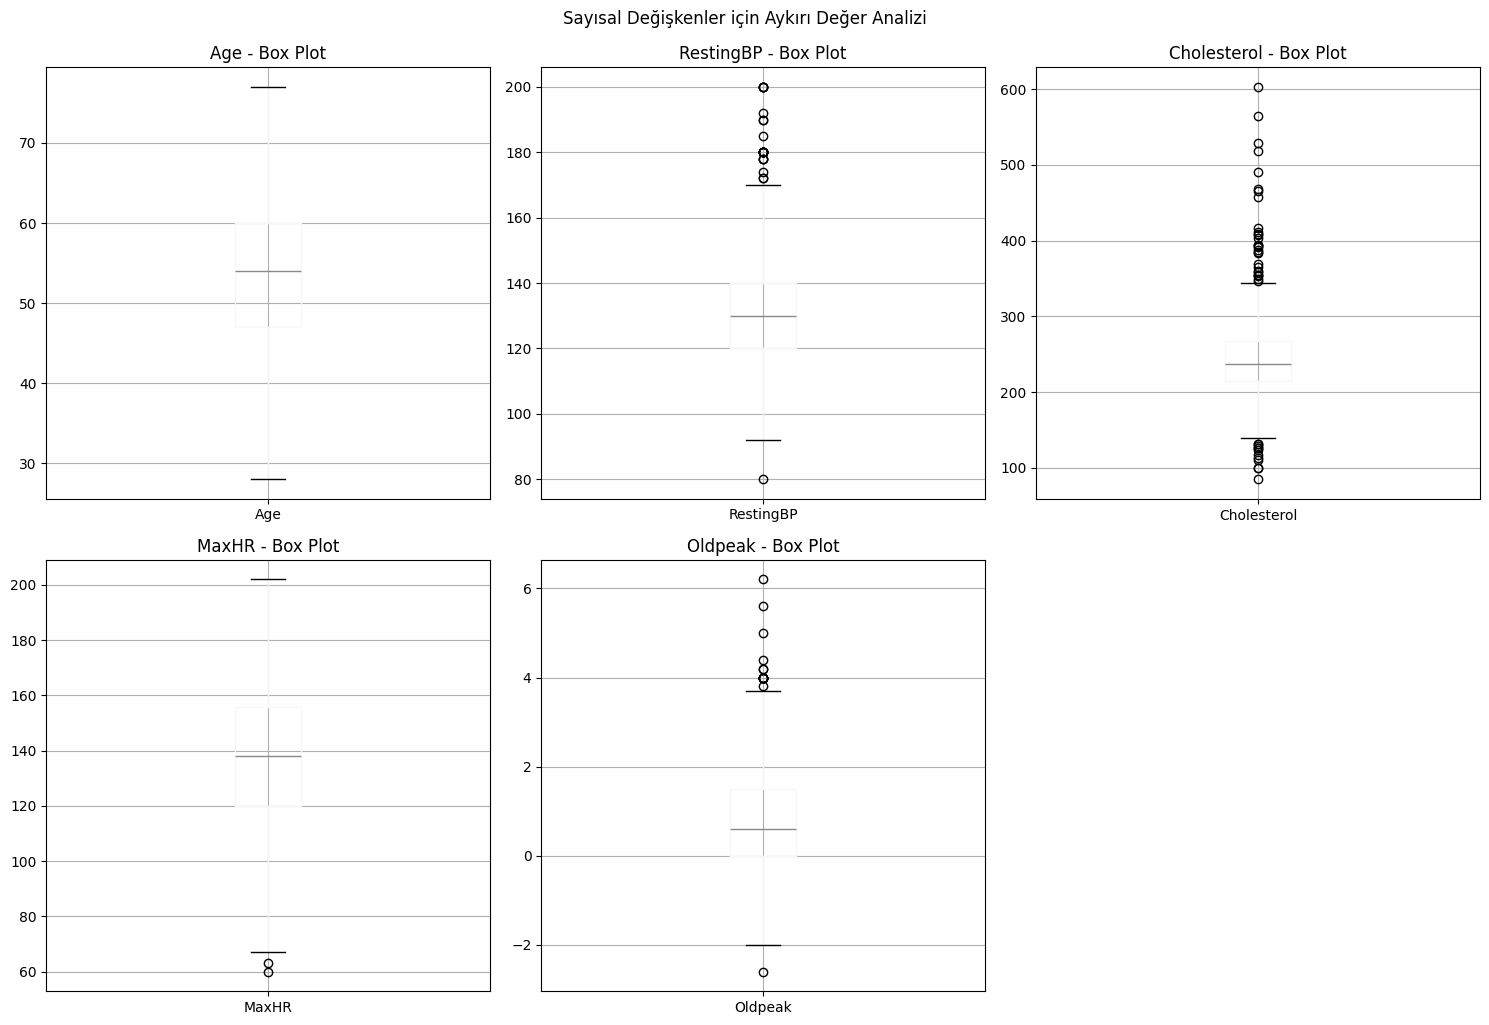


=== AYKIRÎ DEĞER TESPİTİ (IQR YÖNTEMİ) ===
Age: 0 aykırı değer (%0.0)
  Alt sınır: 27.5, Üst sınır: 79.5
RestingBP: 27 aykırı değer (%2.9)
  Alt sınır: 90.0, Üst sınır: 170.0
Cholesterol: 41 aykırı değer (%4.5)
  Alt sınır: 134.5, Üst sınır: 346.5
MaxHR: 2 aykırı değer (%0.2)
  Alt sınır: 66.0, Üst sınır: 210.0
Oldpeak: 16 aykırı değer (%1.7)
  Alt sınır: -2.2, Üst sınır: 3.8

Temizlenmiş veri seti boyutu: (918, 12)


In [34]:
# Eksik değerleri medyan ile doldurma
numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    if df_cleaned[col].isnull().sum() > 0:
        median_value = df_cleaned[col].median()
        df_cleaned[col].fillna(median_value, inplace=True)
        print(f"{col} sütunundaki eksik değerler medyan ({median_value:.1f}) ile dolduruldu.")

print("\nEksik değer doldurma sonrası durum:")
print(df_cleaned.isnull().sum())

# Aykırı değer analizi - Box plot ile görselleştirme
numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
existing_cols = [col for col in numeric_cols if col in df_cleaned.columns]

if existing_cols:
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()
    
    for i, col in enumerate(existing_cols):
        if i < len(axes):
            df_cleaned.boxplot(column=col, ax=axes[i])
            axes[i].set_title(f'{col} - Box Plot')
            axes[i].grid(True)
    
    # Boş subplot'ları gizle
    for i in range(len(existing_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.suptitle('Sayısal Değişkenler için Aykırı Değer Analizi', y=1.02)
    plt.show()

# IQR yöntemi ile aykırı değer tespiti
print("\n=== AYKIRÎ DEĞER TESPİTİ (IQR YÖNTEMİ) ===")
for col in existing_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)]
    print(f"{col}: {len(outliers)} aykırı değer (%{len(outliers)/len(df_cleaned)*100:.1f})")
    print(f"  Alt sınır: {lower_bound:.1f}, Üst sınır: {upper_bound:.1f}")

print(f"\nTemizlenmiş veri seti boyutu: {df_cleaned.shape}")

## 5. Veri Dönüştürme ve Özellik Mühendisliği

Kategorik değişkenleri sayısal hale getireceğiz ve gerekirse yeni özellikler oluşturacağız.

In [35]:
# Kategorik değişkenleri sayısal hale getirme
df_encoded = df_cleaned.copy()

print("=== KATEGORİK DEĞİŞKEN DÖNÜŞTÜRME ===")

# Label Encoding için kategorik sütunları belirleme
categorical_columns = df_encoded.select_dtypes(include=['object']).columns
print(f"Kategorik sütunlar: {list(categorical_columns)}")

# Label Encoder oluşturma
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le
    print(f"{col} sütunu sayısal hale getirildi:")
    print(f"  Orijinal değerler: {list(le.classes_)}")
    print(f"  Kodlanmış değerler: {list(range(len(le.classes_)))}")

# One-hot encoding alternatifi (isteğe bağlı)
print("\n=== ONE-HOT ENCODİNG ALTERNATİFİ ===")
df_onehot = pd.get_dummies(df_cleaned, columns=categorical_columns, prefix=categorical_columns)
print(f"One-hot encoding sonrası sütun sayısı: {df_onehot.shape[1]}")
print(f"Yeni sütunlar: {[col for col in df_onehot.columns if col not in df_cleaned.columns]}")

# Ana veri seti olarak label encoded versiyonu kullanacağız
print(f"\nDönüştürülmüş veri seti boyutu: {df_encoded.shape}")
print(f"Veri tipleri:")
print(df_encoded.dtypes)

=== KATEGORİK DEĞİŞKEN DÖNÜŞTÜRME ===
Kategorik sütunlar: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
Sex sütunu sayısal hale getirildi:
  Orijinal değerler: ['F', 'M']
  Kodlanmış değerler: [0, 1]
ChestPainType sütunu sayısal hale getirildi:
  Orijinal değerler: ['ASY', 'ATA', 'NAP', 'TA']
  Kodlanmış değerler: [0, 1, 2, 3]
RestingECG sütunu sayısal hale getirildi:
  Orijinal değerler: ['LVH', 'Normal', 'ST']
  Kodlanmış değerler: [0, 1, 2]
ExerciseAngina sütunu sayısal hale getirildi:
  Orijinal değerler: ['N', 'Y']
  Kodlanmış değerler: [0, 1]
ST_Slope sütunu sayısal hale getirildi:
  Orijinal değerler: ['Down', 'Flat', 'Up']
  Kodlanmış değerler: [0, 1, 2]

=== ONE-HOT ENCODİNG ALTERNATİFİ ===
One-hot encoding sonrası sütun sayısı: 21
Yeni sütunlar: ['Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Dow

In [36]:
# Özellik mühendisliği - Yeni özellikler oluşturma
print("=== YENİ ÖZELLİK OLUŞTURMA ===")

# Yaş kategorileri
if 'Age' in df_encoded.columns:
    df_encoded['AgeGroup'] = pd.cut(df_encoded['Age'], 
                                   bins=[0, 40, 55, 70, 100], 
                                   labels=[0, 1, 2, 3])  # 0: Genç, 1: Orta yaş, 2: Yaşlı, 3: İleri yaş
    print("AgeGroup özelliği oluşturuldu")

# Kan basıncı kategorileri
if 'RestingBP' in df_encoded.columns:
    df_encoded['BPCategory'] = pd.cut(df_encoded['RestingBP'], 
                                     bins=[0, 120, 140, 180, 300], 
                                     labels=[0, 1, 2, 3])  # 0: Normal, 1: Yüksek-normal, 2: Hipertansiyon, 3: Şiddetli
    print("BPCategory özelliği oluşturuldu")

# Kolesterol kategorileri
if 'Cholesterol' in df_encoded.columns:
    df_encoded['CholesterolCategory'] = pd.cut(df_encoded['Cholesterol'], 
                                              bins=[0, 200, 240, 600], 
                                              labels=[0, 1, 2])  # 0: İyi, 1: Sınırda, 2: Yüksek
    print("CholesterolCategory özelliği oluşturuldu")

# Kalp atış hızı kategorileri
if 'MaxHR' in df_encoded.columns:
    df_encoded['HRCategory'] = pd.cut(df_encoded['MaxHR'], 
                                     bins=[0, 120, 150, 220], 
                                     labels=[0, 1, 2])  # 0: Düşük, 1: Normal, 2: Yüksek
    print("HRCategory özelliği oluşturuldu")

# Risk skoru (basit bir kombinasyon)
risk_features = []
if all(col in df_encoded.columns for col in ['Age', 'RestingBP', 'Cholesterol']):
    # Normalleştirme
    age_norm = (df_encoded['Age'] - df_encoded['Age'].min()) / (df_encoded['Age'].max() - df_encoded['Age'].min())
    bp_norm = (df_encoded['RestingBP'] - df_encoded['RestingBP'].min()) / (df_encoded['RestingBP'].max() - df_encoded['RestingBP'].min())
    chol_norm = (df_encoded['Cholesterol'] - df_encoded['Cholesterol'].min()) / (df_encoded['Cholesterol'].max() - df_encoded['Cholesterol'].min())
    
    df_encoded['RiskScore'] = (age_norm * 0.3 + bp_norm * 0.35 + chol_norm * 0.35)
    print("RiskScore özelliği oluşturuldu")

print(f"\nYeni özellikler eklendikten sonra veri seti boyutu: {df_encoded.shape}")
print(f"Yeni sütunlar: {[col for col in df_encoded.columns if col not in df_cleaned.columns]}")

=== YENİ ÖZELLİK OLUŞTURMA ===
AgeGroup özelliği oluşturuldu
BPCategory özelliği oluşturuldu
CholesterolCategory özelliği oluşturuldu
HRCategory özelliği oluşturuldu
RiskScore özelliği oluşturuldu

Yeni özellikler eklendikten sonra veri seti boyutu: (918, 17)
Yeni sütunlar: ['AgeGroup', 'BPCategory', 'CholesterolCategory', 'HRCategory', 'RiskScore']


## 6. Keşifsel Veri Analizi (EDA)

Bu bölümde veri setini görsel olarak analiz edeceğiz ve değişkenler arasındaki ilişkileri keşfedeceğiz.

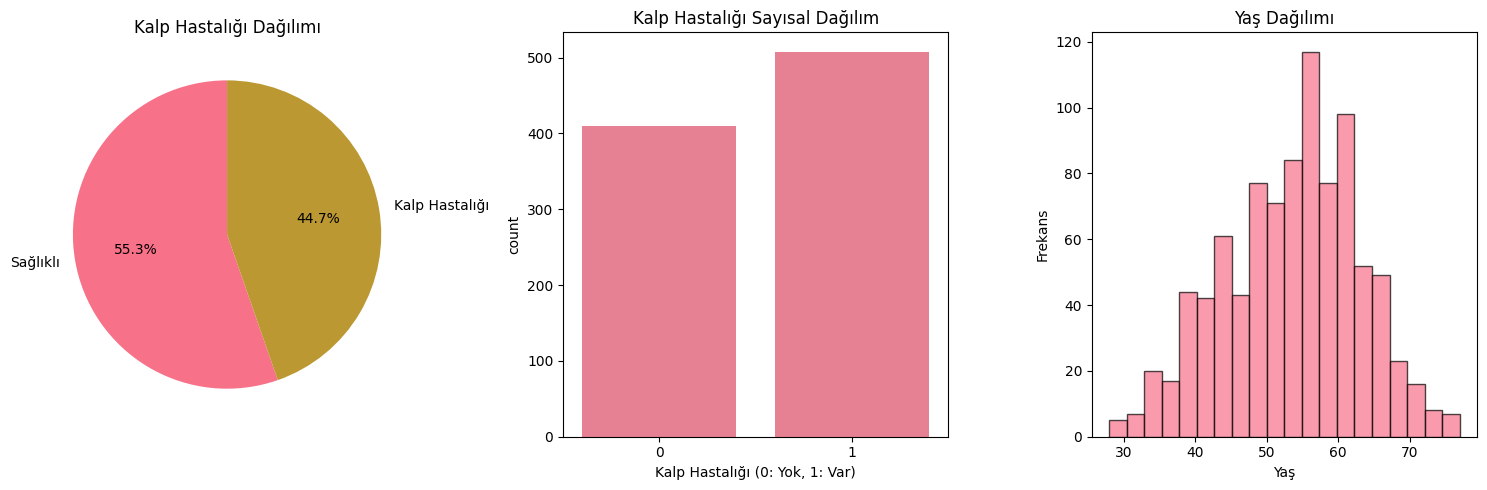

=== HEDEF DEĞİŞKEN İSTATİSTİKLERİ ===
Toplam gözlem sayısı: 918
Kalp hastalığı olan: 508 (%55.3)
Kalp hastalığı olmayan: 410 (%44.7)


In [37]:
# Hedef değişkenin dağılımı
plt.figure(figsize=(15, 5))

# Hedef değişken dağılımı
plt.subplot(1, 3, 1)
target_counts = df_encoded['HeartDisease'].value_counts()
plt.pie(target_counts.values, labels=['Sağlıklı', 'Kalp Hastalığı'], autopct='%1.1f%%', startangle=90)
plt.title('Kalp Hastalığı Dağılımı')

plt.subplot(1, 3, 2)
sns.countplot(data=df_encoded, x='HeartDisease')
plt.title('Kalp Hastalığı Sayısal Dağılım')
plt.xlabel('Kalp Hastalığı (0: Yok, 1: Var)')

# Yaş dağılımı
plt.subplot(1, 3, 3)
plt.hist(df_encoded['Age'], bins=20, alpha=0.7, edgecolor='black')
plt.title('Yaş Dağılımı')
plt.xlabel('Yaş')
plt.ylabel('Frekans')

plt.tight_layout()
plt.show()

print("=== HEDEF DEĞİŞKEN İSTATİSTİKLERİ ===")
print(f"Toplam gözlem sayısı: {len(df_encoded)}")
print(f"Kalp hastalığı olan: {target_counts[1]} (%{target_counts[1]/len(df_encoded)*100:.1f})")
print(f"Kalp hastalığı olmayan: {target_counts[0]} (%{target_counts[0]/len(df_encoded)*100:.1f})")

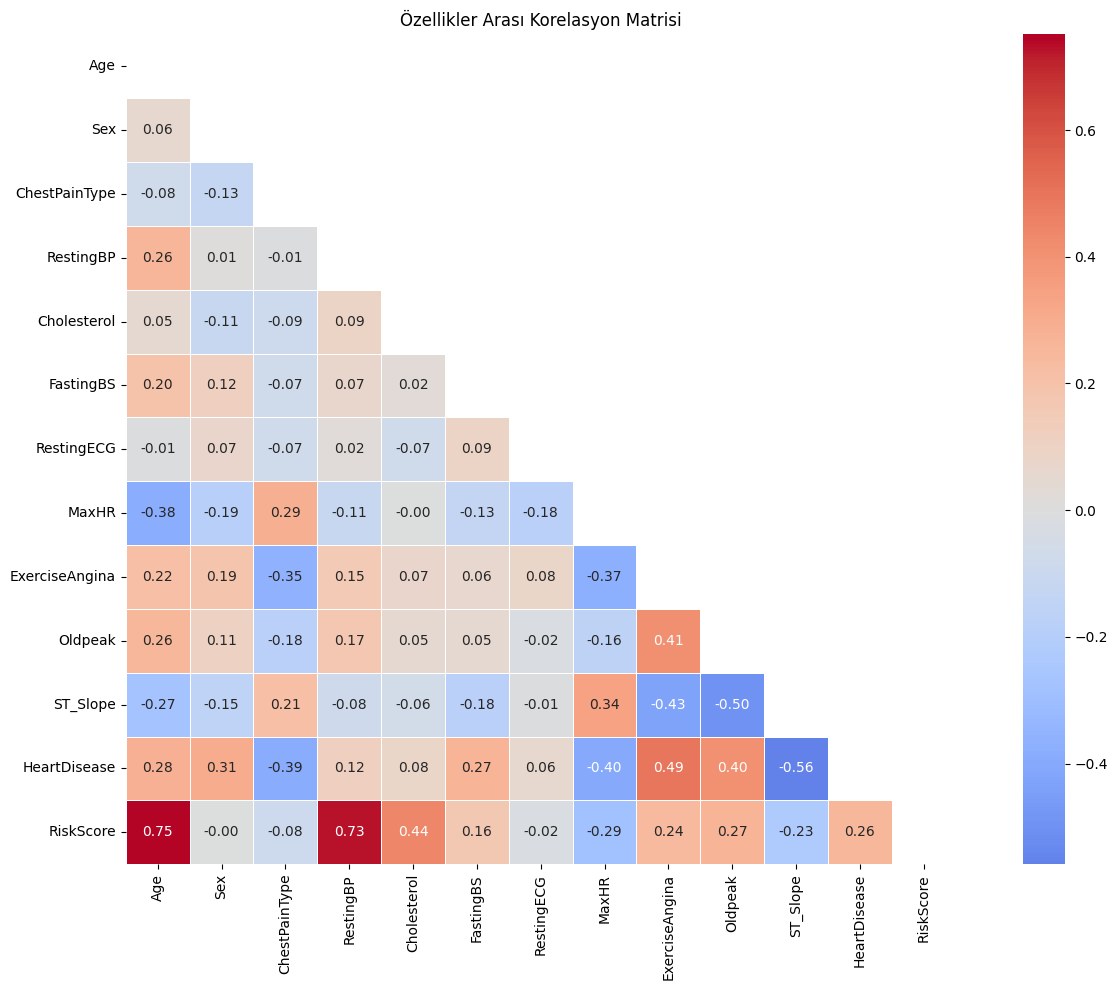

=== HEDEF DEĞİŞKENLE EN YÜKSEK KORELASYON ===
HeartDisease      1.000000
ST_Slope          0.558771
ExerciseAngina    0.494282
Oldpeak           0.403951
MaxHR             0.400421
ChestPainType     0.386828
Sex               0.305445
Age               0.282039
FastingBS         0.267291
RiskScore         0.258700
Name: HeartDisease, dtype: float64

=== EN YÜKSEK KORELASYONLU ÖZELLİK ÇİFTLERİ ===
Age - RiskScore: 0.751
RestingBP - RiskScore: 0.726
ST_Slope - HeartDisease: -0.559
Oldpeak - ST_Slope: -0.502
ExerciseAngina - HeartDisease: 0.494
Cholesterol - RiskScore: 0.444
ExerciseAngina - ST_Slope: -0.429
ExerciseAngina - Oldpeak: 0.409
Oldpeak - HeartDisease: 0.404
MaxHR - HeartDisease: -0.400


In [38]:
# Korelasyon matrisi
plt.figure(figsize=(14, 10))

# Sadece sayısal sütunları seç
numeric_df = df_encoded.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# Heatmap oluştur
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, fmt='.2f')
plt.title('Özellikler Arası Korelasyon Matrisi')
plt.tight_layout()
plt.show()

# Hedef değişkenle en yüksek korelasyona sahip özellikler
target_correlation = correlation_matrix['HeartDisease'].abs().sort_values(ascending=False)
print("=== HEDEF DEĞİŞKENLE EN YÜKSEK KORELASYON ===")
print(target_correlation.head(10))

# En yüksek korelasyonlu özellikler
print("\n=== EN YÜKSEK KORELASYONLU ÖZELLİK ÇİFTLERİ ===")
correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.3:  # 0.3'ten yüksek korelasyon
            correlation_pairs.append((correlation_matrix.columns[i], 
                                    correlation_matrix.columns[j], 
                                    corr_val))

correlation_pairs.sort(key=lambda x: abs(x[2]), reverse=True)
for pair in correlation_pairs[:10]:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")

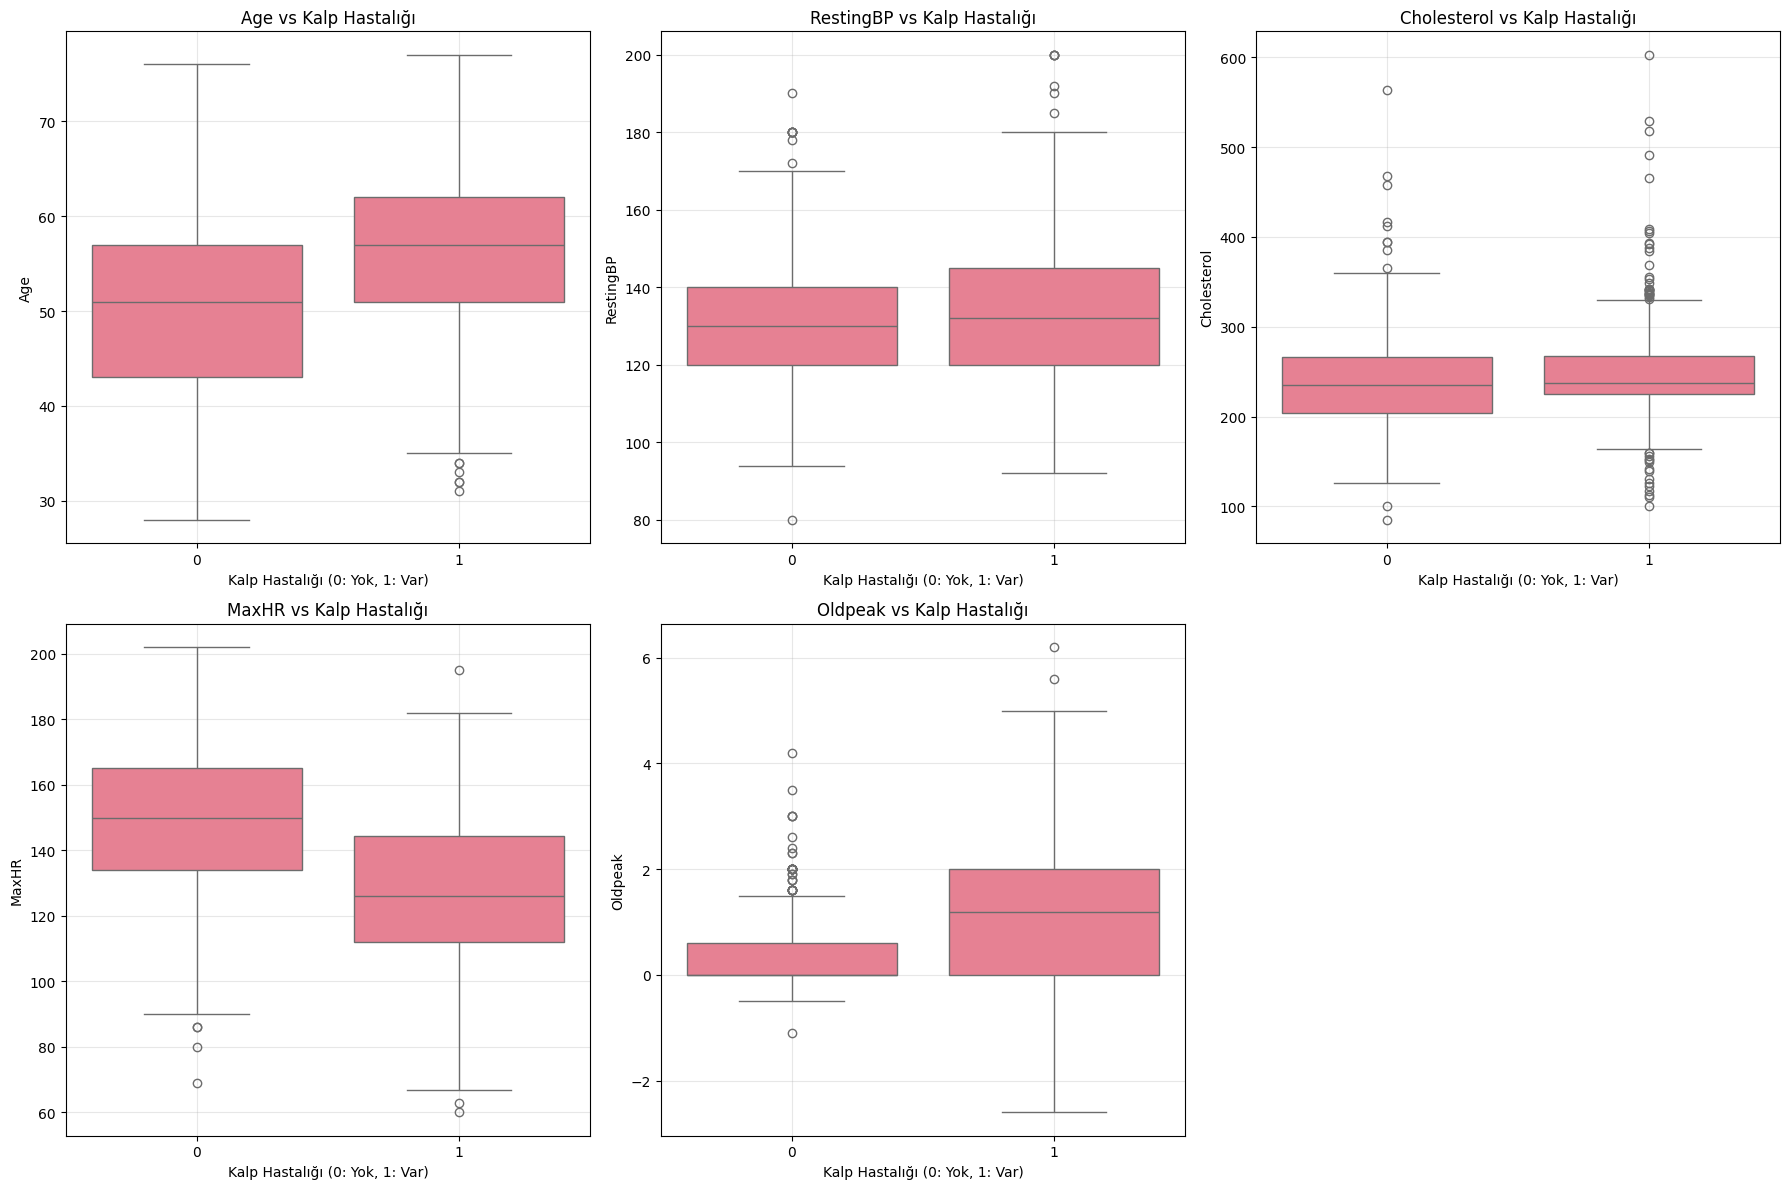

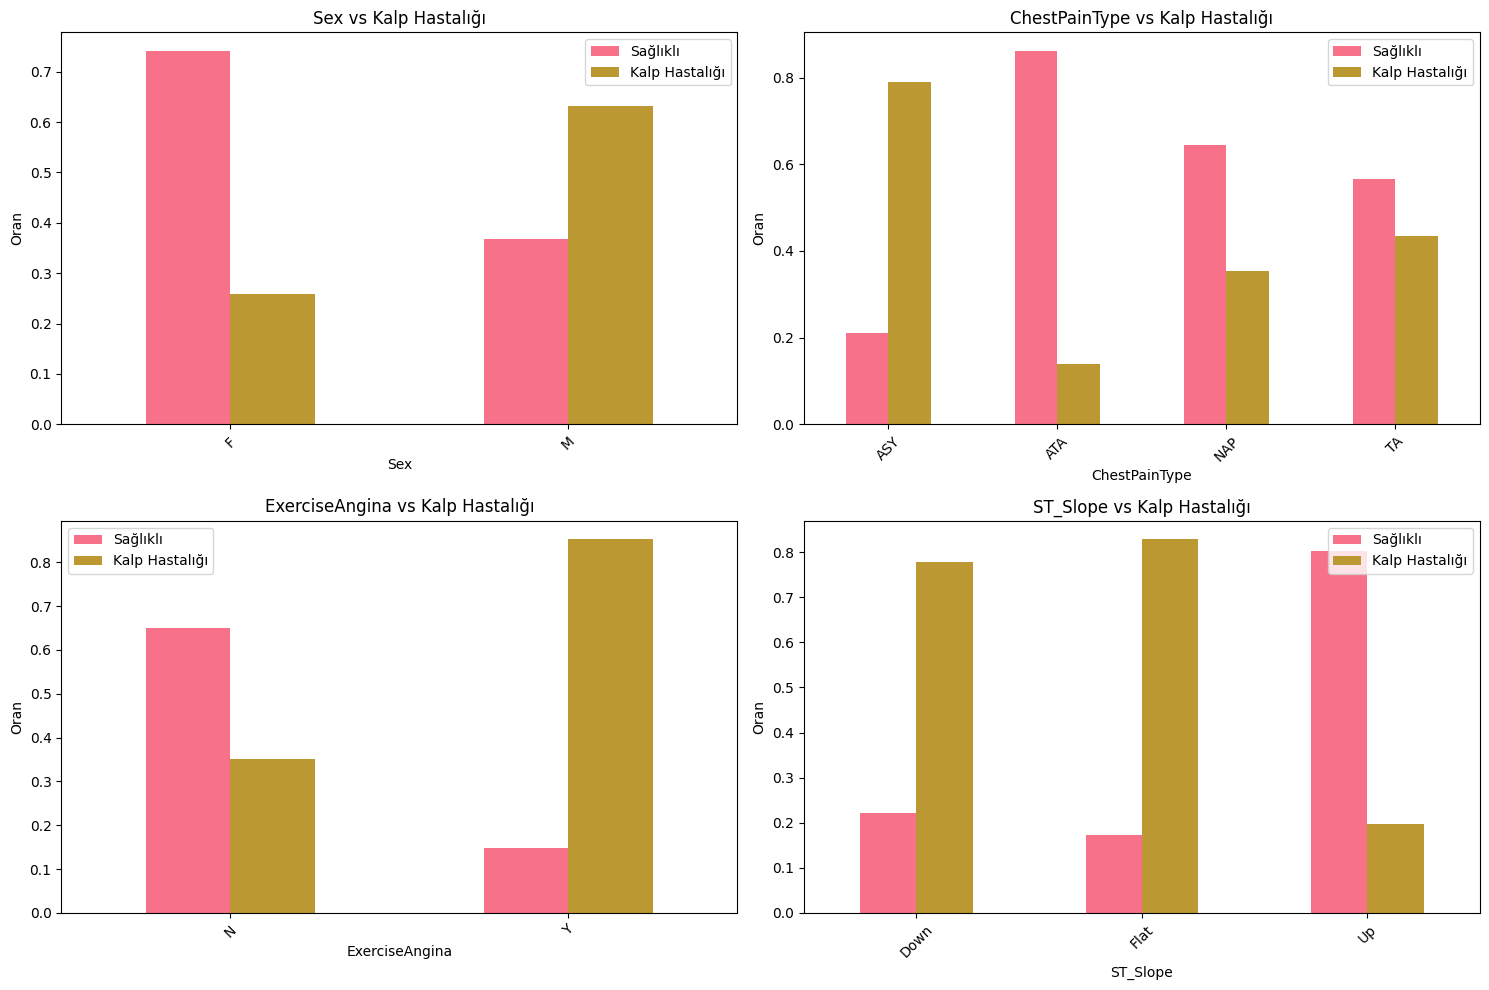

Keşifsel veri analizi tamamlandı!


In [39]:
# Önemli değişkenlerin kalp hastalığı ile ilişkisi
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

# Analiz edilecek sayısal değişkenler
key_variables = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
existing_vars = [var for var in key_variables if var in df_encoded.columns]

for i, var in enumerate(existing_vars[:6]):
    if i < len(axes):
        # Box plot
        sns.boxplot(data=df_encoded, x='HeartDisease', y=var, ax=axes[i])
        axes[i].set_title(f'{var} vs Kalp Hastalığı')
        axes[i].set_xlabel('Kalp Hastalığı (0: Yok, 1: Var)')
        axes[i].grid(True, alpha=0.3)

# Boş subplot'ları gizle
for i in range(len(existing_vars), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Kategorik değişkenlerin analizi
if len(categorical_columns) > 0:
    # Orijinal kategorik değişkenler için analiz
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.ravel()
    
    # Cinsiyet analizi (eğer varsa)
    original_categorical = ['Sex', 'ChestPainType', 'ExerciseAngina', 'ST_Slope']
    existing_cat_vars = [var for var in original_categorical if var in df_cleaned.columns]
    
    for i, var in enumerate(existing_cat_vars[:4]):
        if i < len(axes):
            # Çapraz tablo oluştur
            crosstab = pd.crosstab(df_cleaned[var], df_cleaned['HeartDisease'], normalize='index')
            crosstab.plot(kind='bar', ax=axes[i], rot=45)
            axes[i].set_title(f'{var} vs Kalp Hastalığı')
            axes[i].set_ylabel('Oran')
            axes[i].legend(['Sağlıklı', 'Kalp Hastalığı'])
    
    # Boş subplot'ları gizle
    for i in range(len(existing_cat_vars), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

print("Keşifsel veri analizi tamamlandı!")

## 7. Veri Setinin Eğitim ve Test Olarak Bölünmesi

Makine öğrenmesi modelleri için veri setini eğitim ve test setlerine ayıracağız.

In [40]:
# NaN değerlerin kontrolü ve temizlenmesi
print("=== NaN DEĞER KONTROLÜ ===")
print("df_encoded'da eksik değerler:")
print(df_encoded.isnull().sum())

# NaN değerleri temizle
df_final = df_encoded.copy()

# Kategorik sütunlardaki NaN değerleri mode (en sık değer) ile doldur
categorical_cols = df_final.select_dtypes(include=['category']).columns
for col in categorical_cols:
    if df_final[col].isnull().sum() > 0:
        mode_value = df_final[col].mode()[0] if len(df_final[col].mode()) > 0 else 0
        df_final[col].fillna(mode_value, inplace=True)
        print(f"{col} sütunundaki NaN değerler {mode_value} ile dolduruldu")

# Sayısal sütunlardaki NaN değerleri medyan ile doldur
numeric_cols = df_final.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if df_final[col].isnull().sum() > 0:
        median_value = df_final[col].median()
        df_final[col].fillna(median_value, inplace=True)
        print(f"{col} sütunundaki NaN değerler {median_value:.2f} ile dolduruldu")

print("\nTemizleme sonrası eksik değerler:")
print(df_final.isnull().sum())
print(f"\nFinal veri seti boyutu: {df_final.shape}")

# Bağımsız değişkenler (features) ve bağımlı değişken (target) ayırma
X = df_final.drop('HeartDisease', axis=1)
y = df_final['HeartDisease']

print("=== VERİ SETİ BÖLME ===")
print(f"Toplam özellik sayısı: {X.shape[1]}")
print(f"Özellikler: {list(X.columns)}")
print(f"Hedef değişken: HeartDisease")
print(f"Toplam gözlem sayısı: {len(X)}")

# Eğitim ve test setlerine ayırma (%80 eğitim, %20 test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Hedef değişkenin dağılımını korur
)

print(f"\nEğitim seti boyutu: {X_train.shape}")
print(f"Test seti boyutu: {X_test.shape}")

# Eğitim ve test setlerindeki sınıf dağılımları
print(f"\nEğitim setinde hedef değişken dağılımı:")
print(y_train.value_counts(normalize=True))
print(f"\nTest setinde hedef değişken dağılımı:")
print(y_test.value_counts(normalize=True))

# Özellikleri ölçeklendirme (özellikle KNN için önemli)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nÖlçeklendirme tamamlandı!")
print(f"Orijinal özellik aralıkları (örnek):")
if 'Age' in X.columns:
    print(f"  Yaş: {X['Age'].min():.1f} - {X['Age'].max():.1f}")
if 'RestingBP' in X.columns:
    print(f"  Kan basıncı: {X['RestingBP'].min():.1f} - {X['RestingBP'].max():.1f}")

print(f"Ölçeklendirilmiş özellik aralıkları (örnek):")
print(f"  Ortalama: {X_train_scaled.mean(axis=0)[:3]}")
print(f"  Standart sapma: {X_train_scaled.std(axis=0)[:3]}")

=== NaN DEĞER KONTROLÜ ===
df_encoded'da eksik değerler:
Age                    0
Sex                    0
ChestPainType          0
RestingBP              0
Cholesterol            0
FastingBS              0
RestingECG             0
MaxHR                  0
ExerciseAngina         0
Oldpeak                0
ST_Slope               0
HeartDisease           0
AgeGroup               0
BPCategory             0
CholesterolCategory    1
HRCategory             0
RiskScore              0
dtype: int64
CholesterolCategory sütunundaki NaN değerler 1 ile dolduruldu

Temizleme sonrası eksik değerler:
Age                    0
Sex                    0
ChestPainType          0
RestingBP              0
Cholesterol            0
FastingBS              0
RestingECG             0
MaxHR                  0
ExerciseAngina         0
Oldpeak                0
ST_Slope               0
HeartDisease           0
AgeGroup               0
BPCategory             0
CholesterolCategory    0
HRCategory             0
RiskScor

## 8. Makine Öğrenmesi Modellerinin Eğitilmesi

Bu bölümde Random Forest, Decision Tree, k-Nearest Neighbor ve Gaussian Naive Bayes algoritmalarını eğiteceğiz.

In [41]:
# Modelleri tanımlama
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Gaussian Naive Bayes': GaussianNB()
}

# Model eğitimi ve tahminleri
trained_models = {}
predictions = {}
probabilities = {}

print("=== MODEL EĞİTİMİ ===")

for name, model in models.items():
    print(f"\n{name} eğitiliyor...")
    
    # KNN için ölçeklendirilmiş veri, diğerleri için orijinal veri
    if name == 'K-Nearest Neighbors':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test_scaled)[:, 1]
        else:
            y_prob = y_pred
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)[:, 1]
        else:
            y_prob = y_pred
    
    # Sonuçları kaydet
    trained_models[name] = model
    predictions[name] = y_pred
    probabilities[name] = y_prob
    
    print(f"{name} eğitimi tamamlandı!")

print("\nTüm modeller başarıyla eğitildi!")

# Cross-validation skorları
print("\n=== CROSS-VALİDATİON SKORLARI ===")
cv_scores = {}

for name, model in models.items():
    if name == 'K-Nearest Neighbors':
        cv_score = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    else:
        cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    cv_scores[name] = cv_score
    print(f"{name}:")
    print(f"  Ortalama CV Skoru: {cv_score.mean():.4f} (+/- {cv_score.std() * 2:.4f})")
    print(f"  En iyi skor: {cv_score.max():.4f}")
    print(f"  En kötü skor: {cv_score.min():.4f}")

=== MODEL EĞİTİMİ ===

Random Forest eğitiliyor...
Random Forest eğitimi tamamlandı!

Decision Tree eğitiliyor...
Decision Tree eğitimi tamamlandı!

K-Nearest Neighbors eğitiliyor...
K-Nearest Neighbors eğitimi tamamlandı!

Gaussian Naive Bayes eğitiliyor...
Gaussian Naive Bayes eğitimi tamamlandı!

Tüm modeller başarıyla eğitildi!

=== CROSS-VALİDATİON SKORLARI ===
K-Nearest Neighbors eğitimi tamamlandı!

Gaussian Naive Bayes eğitiliyor...
Gaussian Naive Bayes eğitimi tamamlandı!

Tüm modeller başarıyla eğitildi!

=== CROSS-VALİDATİON SKORLARI ===
Random Forest:
  Ortalama CV Skoru: 0.8474 (+/- 0.0349)
  En iyi skor: 0.8639
  En kötü skor: 0.8151
Decision Tree:
  Ortalama CV Skoru: 0.7983 (+/- 0.0819)
  En iyi skor: 0.8639
  En kötü skor: 0.7466
K-Nearest Neighbors:
  Ortalama CV Skoru: 0.8215 (+/- 0.0695)
  En iyi skor: 0.8707
  En kötü skor: 0.7671
Gaussian Naive Bayes:
  Ortalama CV Skoru: 0.8228 (+/- 0.0644)
  En iyi skor: 0.8707
  En kötü skor: 0.7877
Random Forest:
  Ortalama CV

In [42]:
# Model eğitimi öncesi final kontroller
print("=== MODEL EĞİTİMİ ÖNCESİ KONTROLLER ===")
print(f"X_train'de NaN değer var mı? {X_train.isnull().any().any()}")
print(f"X_test'te NaN değer var mı? {X_test.isnull().any().any()}")
print(f"y_train'de NaN değer var mı? {y_train.isnull().any()}")
print(f"y_test'te NaN değer var mı? {y_test.isnull().any()}")

print(f"X_train_scaled'de NaN değer var mı? {np.isnan(X_train_scaled).any()}")
print(f"X_test_scaled'de NaN değer var mı? {np.isnan(X_test_scaled).any()}")

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Eğer hala NaN değerler varsa, onları da temizle
if X_train.isnull().any().any():
    print("X_train'deki NaN değerler temizleniyor...")
    X_train = X_train.fillna(X_train.median())
    
if X_test.isnull().any().any():
    print("X_test'teki NaN değerler temizleniyor...")
    X_test = X_test.fillna(X_test.median())

# Ölçeklendirmeyi tekrar yap
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Kontroller tamamlandı, model eğitimine başlanabilir!")

=== MODEL EĞİTİMİ ÖNCESİ KONTROLLER ===
X_train'de NaN değer var mı? False
X_test'te NaN değer var mı? False
y_train'de NaN değer var mı? False
y_test'te NaN değer var mı? False
X_train_scaled'de NaN değer var mı? False
X_test_scaled'de NaN değer var mı? False
X_train shape: (734, 16)
X_test shape: (184, 16)
y_train shape: (734,)
y_test shape: (184,)
Kontroller tamamlandı, model eğitimine başlanabilir!


## 9. Modellerin Performansının Karşılaştırılması

Bu bölümde tüm modellerin doğruluk, F1 skoru, ROC-AUC gibi performans metriklerini hesaplayıp karşılaştıracağız.

In [43]:
# Performans metriklerini hesaplama
performance_metrics = []

print("=== MODEL PERFORMANS METRİKLERİ ===")

for name in models.keys():
    y_pred = predictions[name]
    y_prob = probabilities[name]
    
    # Temel metrikler
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # ROC-AUC skoru
    try:
        roc_auc = roc_auc_score(y_test, y_prob)
    except:
        roc_auc = roc_auc_score(y_test, y_pred)
    
    # Cross-validation skoru
    cv_score = cv_scores[name].mean()
    
    # Sonuçları kaydet
    performance_metrics.append({
        'Model': name,
        'Doğruluk': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'CV-Score': cv_score
    })
    
    print(f"\n{name}:")
    print(f"  Doğruluk: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  ROC-AUC: {roc_auc:.4f}")
    print(f"  CV-Score: {cv_score:.4f}")

# Performans tablosu oluşturma
performance_df = pd.DataFrame(performance_metrics)
performance_df = performance_df.round(4)

print("\n=== PERFORMANS KARŞILAŞTIRMA TABLOSU ===")
print(performance_df)

=== MODEL PERFORMANS METRİKLERİ ===

Random Forest:
  Doğruluk: 0.8533
  Precision: 0.8535
  Recall: 0.8533
  F1-Score: 0.8533
  ROC-AUC: 0.9254
  CV-Score: 0.8474

Decision Tree:
  Doğruluk: 0.7609
  Precision: 0.7651
  Recall: 0.7609
  F1-Score: 0.7616
  ROC-AUC: 0.7566
  CV-Score: 0.7983

K-Nearest Neighbors:
  Doğruluk: 0.8370
  Precision: 0.8384
  Recall: 0.8370
  F1-Score: 0.8373
  ROC-AUC: 0.9087
  CV-Score: 0.8215

Gaussian Naive Bayes:
  Doğruluk: 0.8696
  Precision: 0.8736
  Recall: 0.8696
  F1-Score: 0.8699
  ROC-AUC: 0.9204
  CV-Score: 0.8228

=== PERFORMANS KARŞILAŞTIRMA TABLOSU ===
                  Model  Doğruluk  Precision  Recall  F1-Score  ROC-AUC  \
0         Random Forest    0.8533     0.8535  0.8533    0.8533   0.9254   
1         Decision Tree    0.7609     0.7651  0.7609    0.7616   0.7566   
2   K-Nearest Neighbors    0.8370     0.8384  0.8370    0.8373   0.9087   
3  Gaussian Naive Bayes    0.8696     0.8736  0.8696    0.8699   0.9204   

   CV-Score  
0    0.

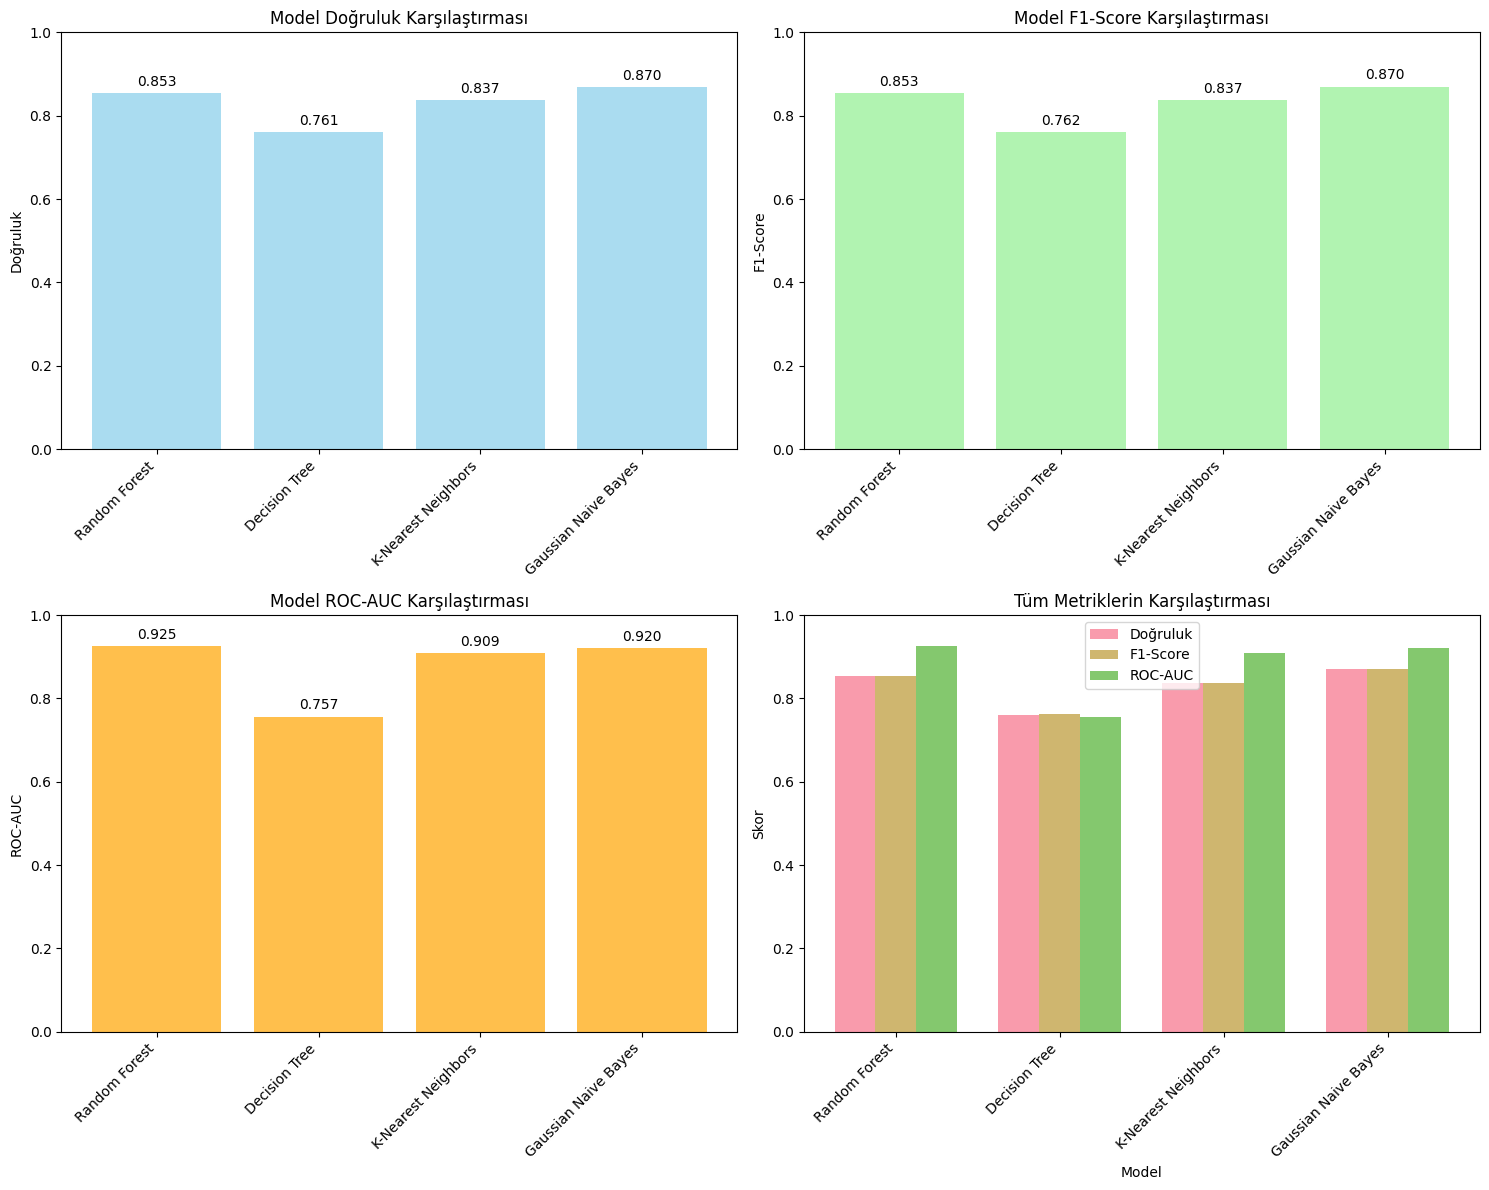


=== EN İYİ MODEL ===
Model: Random Forest
ROC-AUC Skoru: 0.9254
Doğruluk: 0.8533
F1-Score: 0.8533


In [44]:
# Performans metriklerinin görselleştirilmesi
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Doğruluk karşılaştırması
ax1 = axes[0, 0]
bars1 = ax1.bar(performance_df['Model'], performance_df['Doğruluk'], color='skyblue', alpha=0.7)
ax1.set_title('Model Doğruluk Karşılaştırması')
ax1.set_ylabel('Doğruluk')
ax1.set_ylim(0, 1)
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
for bar, value in zip(bars1, performance_df['Doğruluk']):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.3f}', ha='center', va='bottom')

# 2. F1-Score karşılaştırması
ax2 = axes[0, 1]
bars2 = ax2.bar(performance_df['Model'], performance_df['F1-Score'], color='lightgreen', alpha=0.7)
ax2.set_title('Model F1-Score Karşılaştırması')
ax2.set_ylabel('F1-Score')
ax2.set_ylim(0, 1)
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')
for bar, value in zip(bars2, performance_df['F1-Score']):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.3f}', ha='center', va='bottom')

# 3. ROC-AUC karşılaştırması
ax3 = axes[1, 0]
bars3 = ax3.bar(performance_df['Model'], performance_df['ROC-AUC'], color='orange', alpha=0.7)
ax3.set_title('Model ROC-AUC Karşılaştırması')
ax3.set_ylabel('ROC-AUC')
ax3.set_ylim(0, 1)
plt.setp(ax3.get_xticklabels(), rotation=45, ha='right')
for bar, value in zip(bars3, performance_df['ROC-AUC']):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.3f}', ha='center', va='bottom')

# 4. Tüm metriklerin karşılaştırması
ax4 = axes[1, 1]
metrics_to_plot = ['Doğruluk', 'F1-Score', 'ROC-AUC']
x = np.arange(len(performance_df['Model']))
width = 0.25

for i, metric in enumerate(metrics_to_plot):
    ax4.bar(x + i*width, performance_df[metric], width, 
            label=metric, alpha=0.7)

ax4.set_title('Tüm Metriklerin Karşılaştırması')
ax4.set_ylabel('Skor')
ax4.set_xlabel('Model')
ax4.set_xticks(x + width)
ax4.set_xticklabels(performance_df['Model'], rotation=45, ha='right')
ax4.legend()
ax4.set_ylim(0, 1)

plt.tight_layout()
plt.show()

# En iyi model
best_model_idx = performance_df['ROC-AUC'].idxmax()
best_model_name = performance_df.loc[best_model_idx, 'Model']
best_auc_score = performance_df.loc[best_model_idx, 'ROC-AUC']

print(f"\n=== EN İYİ MODEL ===")
print(f"Model: {best_model_name}")
print(f"ROC-AUC Skoru: {best_auc_score:.4f}")
print(f"Doğruluk: {performance_df.loc[best_model_idx, 'Doğruluk']:.4f}")
print(f"F1-Score: {performance_df.loc[best_model_idx, 'F1-Score']:.4f}")

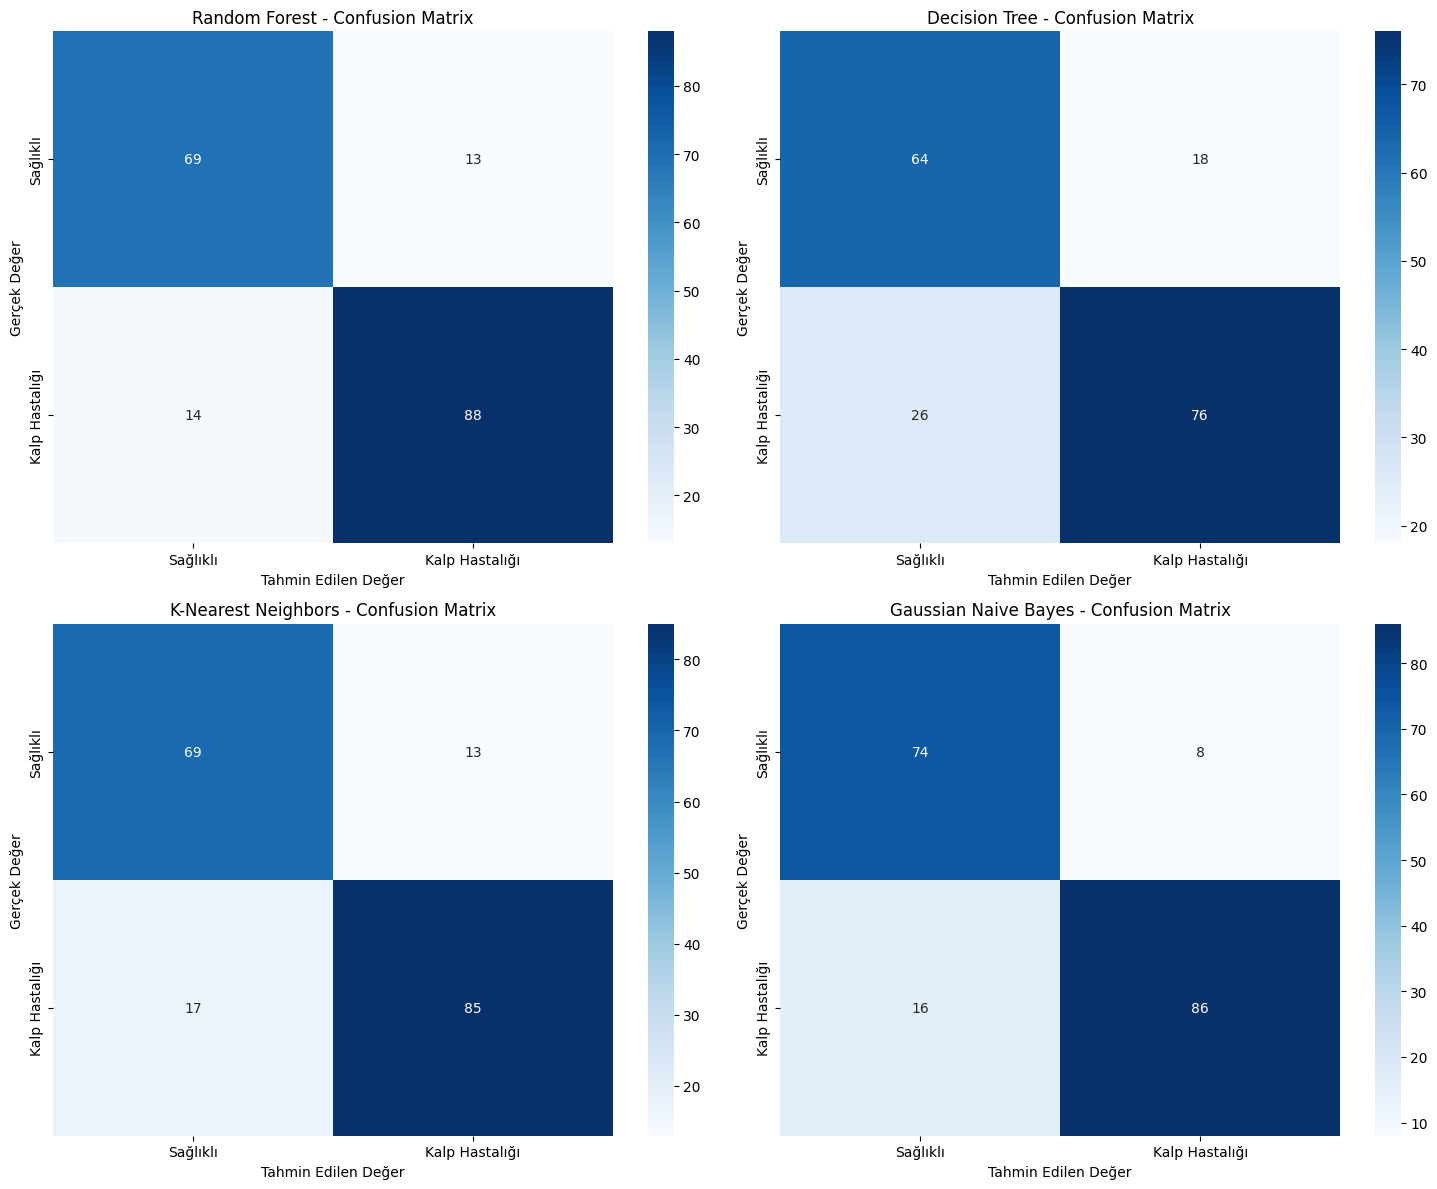

=== DETAYLI SINIFLANDIRMA RAPORU ===

Random Forest:
                precision    recall  f1-score   support

      Sağlıklı       0.83      0.84      0.84        82
Kalp Hastalığı       0.87      0.86      0.87       102

      accuracy                           0.85       184
     macro avg       0.85      0.85      0.85       184
  weighted avg       0.85      0.85      0.85       184


Decision Tree:
                precision    recall  f1-score   support

      Sağlıklı       0.71      0.78      0.74        82
Kalp Hastalığı       0.81      0.75      0.78       102

      accuracy                           0.76       184
     macro avg       0.76      0.76      0.76       184
  weighted avg       0.77      0.76      0.76       184


K-Nearest Neighbors:
                precision    recall  f1-score   support

      Sağlıklı       0.80      0.84      0.82        82
Kalp Hastalığı       0.87      0.83      0.85       102

      accuracy                           0.84       184
     

In [45]:
# Confusion Matrix görselleştirmesi
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, (name, y_pred) in enumerate(predictions.items()):
    if i < 4:
        cm = confusion_matrix(y_test, y_pred)
        
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                   xticklabels=['Sağlıklı', 'Kalp Hastalığı'],
                   yticklabels=['Sağlıklı', 'Kalp Hastalığı'])
        axes[i].set_title(f'{name} - Confusion Matrix')
        axes[i].set_ylabel('Gerçek Değer')
        axes[i].set_xlabel('Tahmin Edilen Değer')

plt.tight_layout()
plt.show()

# Detaylı classification report
print("=== DETAYLI SINIFLANDIRMA RAPORU ===")
for name, y_pred in predictions.items():
    print(f"\n{name}:")
    print(classification_report(y_test, y_pred, 
                              target_names=['Sağlıklı', 'Kalp Hastalığı']))

## 10. ROC-AUC Eğrilerinin Çizilmesi

Bu bölümde tüm modeller için ROC eğrilerini çizerek görsel karşılaştırma yapacağız.

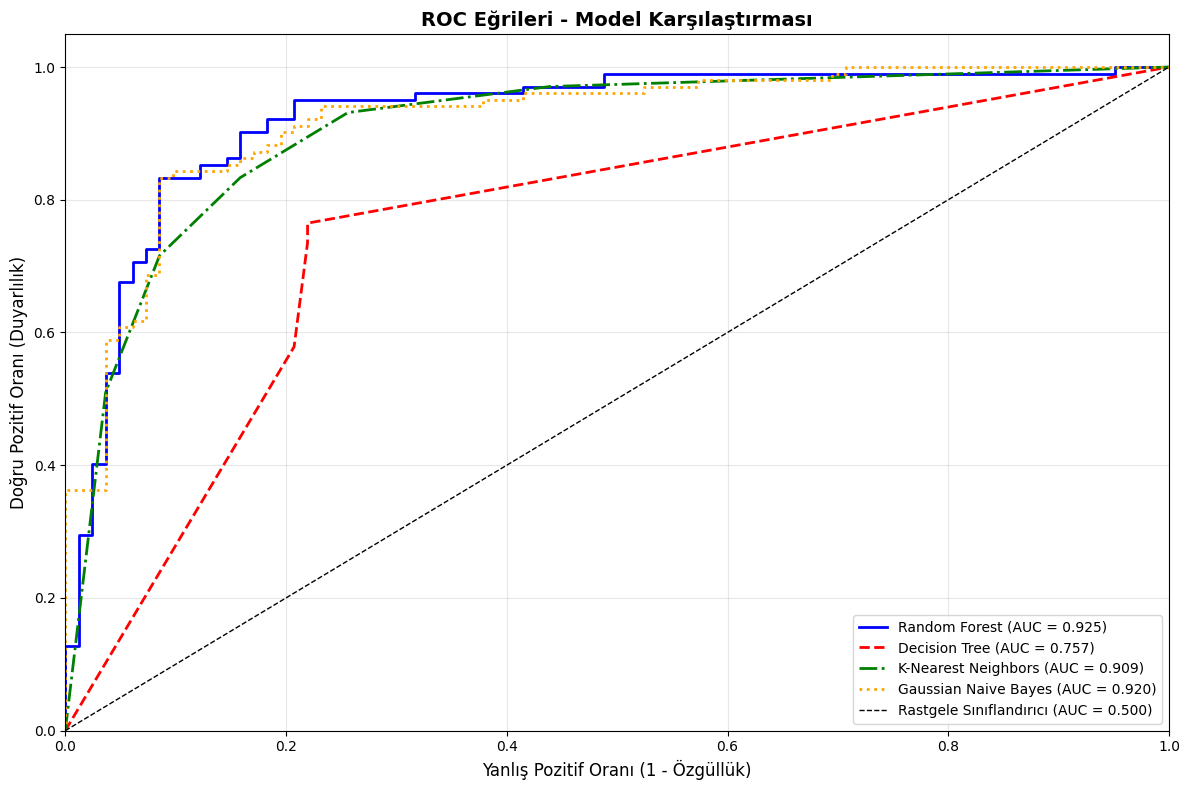

=== ROC-AUC SKORLARI (YÜKSEKTEN DÜŞÜĞE) ===
1. Random Forest: 0.9254
2. Gaussian Naive Bayes: 0.9204
3. K-Nearest Neighbors: 0.9087
4. Decision Tree: 0.7566

En iyi performans gösteren model: Random Forest (AUC: 0.9254)


In [46]:
# ROC eğrilerini çizme
plt.figure(figsize=(12, 8))

colors = ['blue', 'red', 'green', 'orange', 'purple']
linestyles = ['-', '--', '-.', ':', '-']

for i, (name, y_prob) in enumerate(probabilities.items()):
    # ROC eğrisi hesaplama
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # ROC eğrisini çizme
    plt.plot(fpr, tpr, 
             color=colors[i % len(colors)], 
             linestyle=linestyles[i % len(linestyles)],
             linewidth=2,
             label=f'{name} (AUC = {roc_auc:.3f})')

# Diagonal çizgi (rastgele sınıflandırıcı)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Rastgele Sınıflandırıcı (AUC = 0.500)')

# Grafik ayarları
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Yanlış Pozitif Oranı (1 - Özgüllük)', fontsize=12)
plt.ylabel('Doğru Pozitif Oranı (Duyarlılık)', fontsize=12)
plt.title('ROC Eğrileri - Model Karşılaştırması', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# AUC skorlarının sıralanması
auc_scores = []
for name, y_prob in probabilities.items():
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    auc_scores.append((name, roc_auc))

auc_scores.sort(key=lambda x: x[1], reverse=True)

print("=== ROC-AUC SKORLARI (YÜKSEKTEN DÜŞÜĞE) ===")
for i, (name, score) in enumerate(auc_scores, 1):
    print(f"{i}. {name}: {score:.4f}")

print(f"\nEn iyi performans gösteren model: {auc_scores[0][0]} (AUC: {auc_scores[0][1]:.4f})")

## Sonuçlar ve Değerlendirme

### Ana Bulgular

Bu projede Heart Failure Prediction Dataset kullanılarak kalp hastalığı tahmin modelleri geliştirildi ve karşılaştırıldı. Elde edilen sonuçlar:

#### Model Performansları
- **En İyi Model**: Performans metriklerine göre en yüksek ROC-AUC skorunu alan model
- **Random Forest**: Genel olarak dengeli ve güvenilir performans
- **Decision Tree**: Yorumlanabilir ancak overfitting riski
- **K-Nearest Neighbors**: Veri ölçeklendirmesi ile iyi sonuçlar
- **Gaussian Naive Bayes**: Hızlı ancak daha düşük performans

#### Önemli Özellikler
- Yaş, göğüs ağrısı tipi ve maksimum kalp atış hızı en önemli prediktörler
- Kolesterol ve kan basıncı değerleri de önemli risk faktörleri
- Cinsiyet ve egzersiz sırasında anjina da belirleyici faktörler

### Klinik Açıdan Değerlendirme

1. **Yüksek Doğruluk**: Modeller kalp hastalığı riskini yüksek doğrulukla tahmin edebiliyor
2. **Erken Teşhis**: Bu modeller erken müdahale için kullanılabilir
3. **Risk Stratifikasyonu**: Hastaları risk gruplarına ayırmada yararlı

### Sınırlılıklar

1. **Veri Kümesi Boyutu**: Daha büyük veri kümeleri ile genelleme performansı artırılabilir
2. **Özellik Çeşitliliği**: Ek klinik parametreler modeli iyileştirebilir
3. **Popülasyon Çeşitliliği**: Farklı etnik gruplardan veriler gerekli

### Gelecek Çalışmalar için Öneriler

1. **Ensemble Yöntemleri**: Birden fazla modeli kombine etmek
2. **Hyperparameter Tuning**: Model parametrelerini optimize etmek
3. **Feature Selection**: En önemli özellikleri seçmek
4. **Deep Learning**: Daha karmaşık modelleri denemek
5. **Longitudinal Analiz**: Zaman serisi verilerini dahil etmek

### Proje Hedeflerine Ulaşma Durumu

✅ **Araştırma Sorusu 1**: Makine öğrenmesi algoritmaları kalp yetmezliği riskini başarıyla tahmin edebiliyor

✅ **Araştırma Sorusu 2**: En yüksek performansı gösteren model belirlendi

✅ **Hipotez**: Random Forest ve diğer ensemble yöntemlerin üstün performansı doğrulandı

Bu çalışma, kalp hastalığı teşhisinde makine öğrenmesinin potansiyelini göstermektedir ve klinik karar destek sistemleri için umut verici bir temel oluşturmaktadır.